In [2]:
from load_data import load_data

path='Files/'
LastOrbit_=False
OLR_=False

verbose=True

runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo,data_olr=load_data(path,LastOrbit_,OLR_,verbose)


Run Name?:EARTH_T21
Pressure OOM?:0
Surface Press [bar]:1.0
  
 ....reading fort.26
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
 
--------------------------
|    ARRAY DIMENSIONS    |
--------------------------
N_levels:  30
N_lons:    64
N_lats:    32
N_params: 

NameError: global name 'nparam' is not defined

# ----------------------------------
#  Temperature Contour Plots 

In [35]:
print data_26.shape
print data_26[0,0,:,1]

(30, 128, 64, 6)
[ 87.864   85.097   82.313   79.526   76.737   73.948   71.158   68.368
  65.578   62.787   59.997   57.207   54.416   51.626   48.835   46.045
  43.254   40.464   37.673   34.883   32.092   29.301   26.511   23.72
  20.93    18.139   15.348   12.558    9.7671   6.9765   4.1859   1.3953
  -1.3953  -4.1859  -6.9765  -9.7671 -12.558  -15.348  -18.139  -20.93
 -23.72   -26.511  -29.301  -32.092  -34.883  -37.673  -40.464  -43.254
 -46.045  -48.835  -51.626  -54.416  -57.207  -59.997  -62.787  -65.578
 -68.368  -71.158  -73.948  -76.737  -79.526  -82.313  -85.097  -87.864 ]


In [25]:
print lat_arr

[ 87.864   85.097   82.313   79.526   76.737   73.948   71.158   68.368
  65.578   62.787   59.997   57.207   54.416   51.626   48.835   46.045
  43.254   40.464   37.673   34.883   32.092   29.301   26.511   23.72
  20.93    18.139   15.348   12.558    9.7671   6.9765   4.1859   1.3953
  -1.3953  -4.1859  -6.9765  -9.7671 -12.558  -15.348  -18.139  -20.93
 -23.72   -26.511  -29.301  -32.092  -34.883  -37.673  -40.464  -43.254
 -46.045  -48.835  -51.626  -54.416  -57.207  -59.997  -62.787  -65.578
 -68.368  -71.158  -73.948  -76.737  -79.526  -82.313  -85.097  -87.864 ]


-------------------------------------------------------
  Plotting Atmosphere Level:  4 -> Pressure= 0.1613
-------------------------------------------------------
Min Temp [K], Plot limit:  167.02 167.0
Max Temp [K], Plot limit:  197.29 198.0
-------------------------------------------------------
89.52879581151831


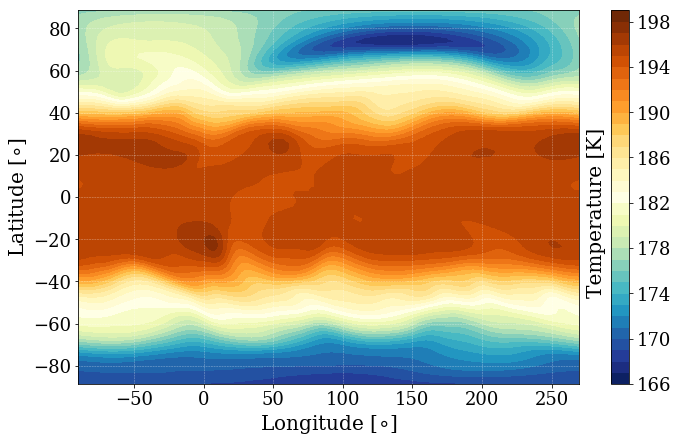

In [3]:
from igcm_Plot import igcm_Plot

lev=4

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot, 4=OLR

vfrac=1.5           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=0.0       #center of plot in degrees
loncenter=0.0 

freeze=False         #adds a black line at water freezing temperature,useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'
if plot==4:
    ptype='OLR'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''

if plot<4:
    savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'
else:
    savename=path+runname+'/'+ptype+pstyle+'.pdf'


ver=True           #verbose output, PLOTS AND TEXT

cbarL=0.0 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0.0 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

%matplotlib inline
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
# ###########################
# plot=1
# ptype='UWIND'
# #cbarL=-33.0
# #cbarM=33.0
# savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

# igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#           savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
# ###########################
# plot=2
# ptype='VWIND'
# #cbarL=-33.0
# #cbarM=33.0
# savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

# igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#           savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
# ###########################
# plot=3
# ptype='STREAM'
# #cbarL=245.0
# #cbarM=305.0
# if ortho==True:
#     savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.png'
# else:
#     savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

# igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#           savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)


# -------------------------------------
# Longitudinally Averaged Plots #

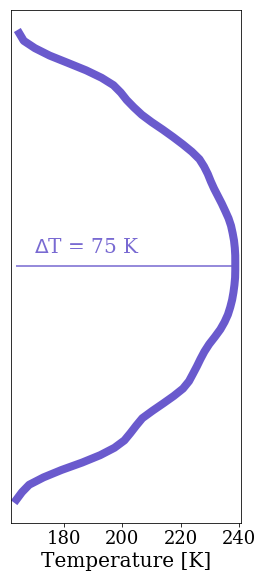

In [7]:
from lon_avg import lon_avg

savepath='Files/'+runname
lev=4
plot=0              #0=temp, 1=U wind, 2=V wind,
lo=True            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.93 #top point of line labels (in 0-1)

noy=True  #don't plot y labels

%matplotlib inline

test=lon_avg(plot,savepath,data_lo,lon_arr,lat_arr,lev,lo,ln,tn,noy)


In [5]:
print data_lo.shape

(30, 192, 96, 6)


********** Maximum of 4 RUNS currently **********
*************************************************
Run Name?:NEPTUNE
Pressure OOM?:5
Surface Press [bar]:30
*************************************************
Enter another run name?? (y or n)y
Run Name?:NEPTUNE_05tdiss
Pressure OOM?:5
Surface Press [bar]:30
*************************************************
Enter another run name?? (y or n)y
Run Name?:NEPTUNE_2tdiss
Pressure OOM?:5
Surface Press [bar]:30
*************************************************
Enter another run name?? (y or n)y
Run Name?:NEPTUNE_10tdiss
Pressure OOM?:5
Surface Press [bar]:30
*************************************************


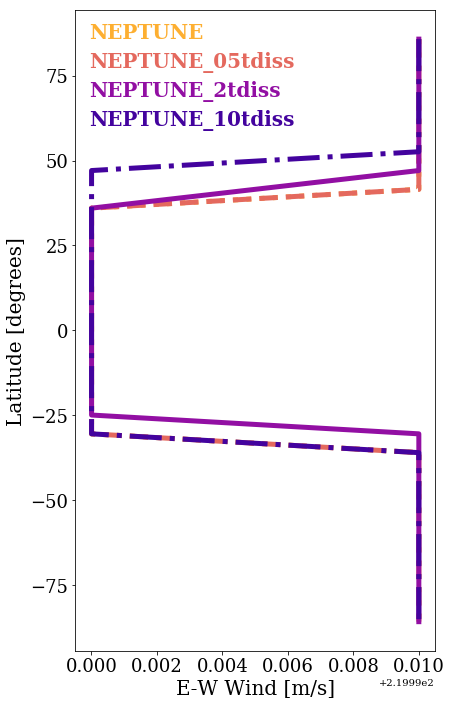

In [4]:
from lon_avg import lon_avg_comp

path='Files/'
lev=29
plot=0              #0=temp, 1=U wind, 2=V wind,
lo=False            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.93 #top point of line labels (in 0-1)

%matplotlib inline
test=lon_avg_comp(path,plot,lev,lo,ln,tn)


In [4]:
## Maybe you want a movie showing the last orbit....
import numpy as np
import imageio
import os
from igcm_Plot import igcm_Plot


lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=2.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=2           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=2           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=0.0 

freeze=True         #adds a black line at water freezing temperature, useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''
    
savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

ver=False           #verbose output, PLOTS AND TEXT

cbarL=np.nanmin(data_lo[lev,:,:,0,:]) #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=np.nanmax(data_lo[lev,:,:,0,:]) #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature
cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

savepath=path+runname+'/LastOrb_F/'

nouts=data_lo.shape[-1]
for t in range(0,nouts):
    lo=True  #holder for last orbit
    savename=savepath+str.zfill(str(int(t)),4)+'.png'
    igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_lo[:,:,:,:,t],lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,lo)
    
file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'lastorb.gif',images,duration=0.35)

-------------------------------------------------------
Min Temp [K], Plot limit:  104.13 104.0
Max Temp [K], Plot limit:  300.16 301.0
-------------------------------------------------------
(30, 96)


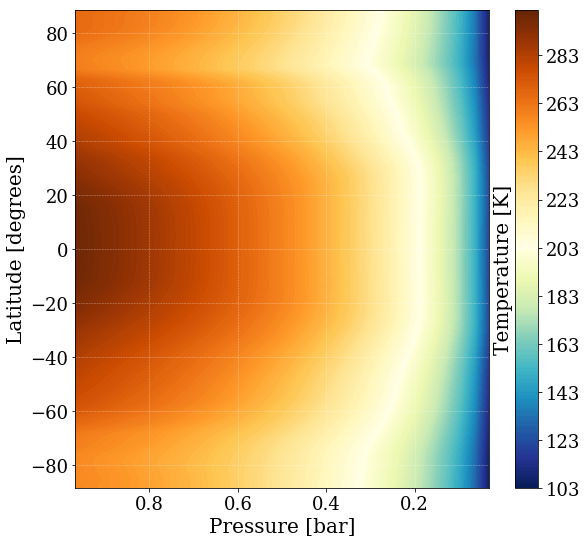

In [15]:
from press_Plot import press_Plot

plot=0              #0 to plot temps, 1 to plot E-W winds, 2=N-S winds. (USUALLY ONLY T AND E-W USED) 

longavg=True       #if True, longavg
long_pl=0.0         #if longavg=True, ignored, otherwise longitude to plot at

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only


freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0


ver=True           #verbose output, PLOTS AND TEXT

cbarL=0.0 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0.0 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True      #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

lo=False            #if True, average of last orbit is used

savefig=True

##########################################################
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'


savename=path+runname+'/Pressure_'+ptype+'.pdf'
##########################################################


%matplotlib inline
press_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,units_a,units_t,units_w,freeze,
          savefig,savename,ver,cbarL,cbarM,cbar_even,ex,ncolors,longavg,long_pl,lo)


(30, 64)
[62 42 31 21  3]
-85.097
-29.301
1.3953
29.301
79.526


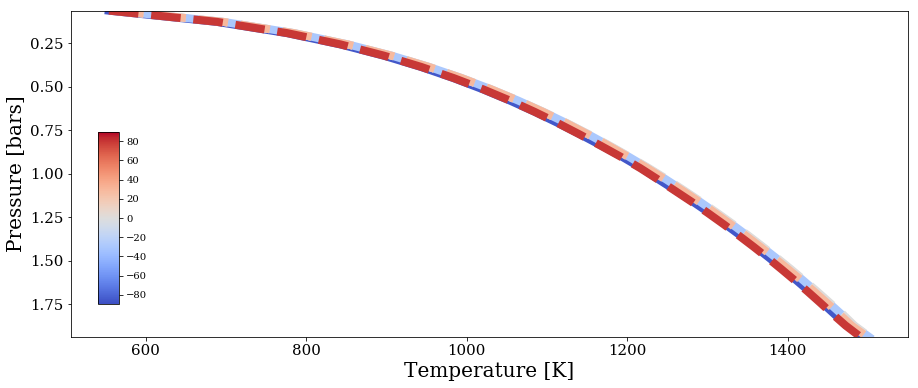

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def t_profile(plot,lons,lats,press,data,lo,sing,lon_v,lat_v,lon_a,lat_a,ver):
    #plot 0=Temp, 1=U wind, 2=Vwind
    #lons=long array
    #lats=lat array
    #data=dat_26
    
    # data_26.shape....
    # lev,lon,lat,(..)
    #      0=lons
    #      1=lats
    #      2=levs
    #      3=u wind
    #      4=v wind
    #      5=temps
    
    #lo= Average last orbit
    #sing= plot single profile
        #lon_v= lon for profile
        #lat_v= lat for profile

        #lon_a=long average (True/False)
        #lat_a=lat average (True/False)
        
        #ver, print temps (useful to re-input into fort.7)

    if plot==0: #TEMPERATURE
        if lo==True:
            ind=0
        else:
            ind=5 
        
    if plot==1:
        if lo==True:
            ind=1
        else:
            ind=3 # uwind
        
    if plot==2:
        if lo==True:
            ind=2
        else:
            ind=4 # vwind
        
    
    data_c=np.copy(data)
    
    if lo==False:
        data=data[:,:,:,ind] #select array
    elif lo==True:
        data=np.nanmedian(data[:,:,:,ind,:],axis=3) 
    
    if sing==True:
        if lon_a==True:
            tp=np.nanmedian(data,axis=1)  #median along axis1 = Longs
            if lat_a==True:
                tp=np.nanmedian(tp,axis=1) #median along axis1=Lats now
            elif lat_a==False:
                tp_where=np.argmin(np.abs(lats-lat_v))
                tp=tp[:,tp_where]
        elif lon_a==False:
            tp_where=np.argmin(np.ans(lons-lon_v))
            tp=data[:,tp_where,:]
            if lat_a==True:
                tp=np.nanmedian(tp,axis=1) #median along axis1 = Lats now
            elif lat_a==False:
                tp_where=np.argmin(np.abs(lats-lat_v))
                tp=tp[:,tp_where]
        print tp.shape #should just be nlevs now
        if ver==True:
            for t in tp:
                print np.round(t,2)
        
        plt.figure(figsize=(10,6))
        plt.plot(tp,press,color='slateblue',linewidth=4.0,alpha=0.7)
        
        plt.ylim(np.nanmax(press),np.nanmin(press))
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.ylabel('Pressure [bars]',fontsize=20)
        plt.xlabel('Temperature [K]',fontsize=20)
        plt.show(block=False)
        
        
        
    elif sing==False:
        tp=np.nanmedian(data,axis=1)   #longitudinal average
        vals=np.array([-85,-30,0,30,80])
        inds=np.array([],dtype=int)
        for v in vals:
            inds=np.append(inds,int(np.argmin(np.abs(lat_arr-v))))
    
        #tp=tp[:,inds]  #should be nlevs,5 now
        
        print tp.shape
        print inds
        
        norm=matplotlib.colors.Normalize(vmin=-90,vmax=90)
        color=matplotlib.cm.coolwarm
        scal_m=matplotlib.cm.ScalarMappable(cmap=color,norm=norm)
        scal_m.set_array([])
        
        fig=plt.figure(figsize=(15,6))
#         for x in range(0,data_c.shape[1]):
#             for y in range(0,data_c.shape[2]):
#                 plt.plot(data_c[:,x,y,5],press,linewidth=0.5,alpha=0.5,color='grey')
        for i in inds:
            print lats[i]
            if lats[i]<0:
                plt.plot(tp[:,i],press,linewidth=8.0,linestyle='-',color=scal_m.to_rgba(lats[i]))
            if lats[i]>0:
                plt.plot(tp[:,i],press,linewidth=8.0,linestyle='--',color=scal_m.to_rgba(lats[i]))
    
        
        plt.ylim(np.nanmax(press),np.nanmin(press))
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.ylabel('Pressure [bars]',fontsize=20)
        plt.xlabel('Temperature [K]',fontsize=20)
        
        cbaxes = fig.add_axes([0.15,0.2,0.02,0.4])
        cb = plt.colorbar(scal_m,cax=cbaxes)
        
        plt.show(block=False)
        
        
        
    
    


plot=0
lo=False
sing=False
lon_v=90
lat_v=0
lon_a=True
lat_a=True
ver=True

t_profile(plot,lon_arr,lat_arr,p_BAR,data_26,lo,sing,lon_v,lat_v,lon_a,lat_a,ver)

In [11]:
import numpy as np
vals=np.array([-85,-30,0,30,80])
inds=np.array([])
for v in vals:
    inds=np.append(inds,np.argmin(np.abs(lat_arr-v)))

print inds

[62. 42. 31. 21.  3.]
